In [108]:
# Import
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import os

In [110]:

# Get the root path of the project
# ROOT_DIR = os.path.abspath("C:/git/flowrate/07_Measure/HomeTap_200917")
ROOT_DIR = os.path.abspath("C:\\Users\\bapti\\Downloads\\Software\\Proto\\Accelerometer\\Soft\\Training\\Measures\\TestTerrainBagnes")
os.chdir(ROOT_DIR)
print(os.getcwd())

C:\Users\bapti\Downloads\Software\Proto\Accelerometer\Soft\Training\Measures\TestTerrainBagnes


In [120]:
'''
directories = ["0,00-1", "0,00-2", "0,00-3", "0,00-4", "0,00-5", "0,00-6", "0,00-7", "0,00-8", "0,00-9", "0,00-10"]

files = ["/0-acc.csv",
        "/1-acc.csv",
        "/2-acc.csv",
        "/3-acc.csv",
        "/4-acc.csv",
        "/5-acc.csv",
        "/6-acc.csv",
        "/7-acc.csv",
        "/8-acc.csv",
        "/9-acc.csv"]
'''
directories = ["0.00-527", "1.65-194", "4.01-882", "7.29-856", "8.92-420", "9.17-96"]

files = ["/0-acc.csv",
        "/1-acc.csv",
        "/2-acc.csv",
        "/3-acc.csv",
        "/4-acc.csv"]


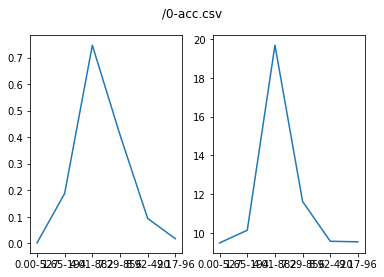

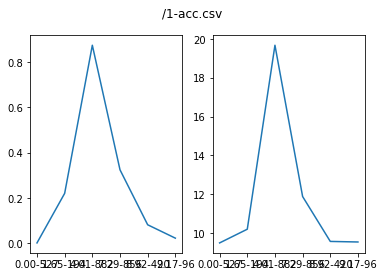

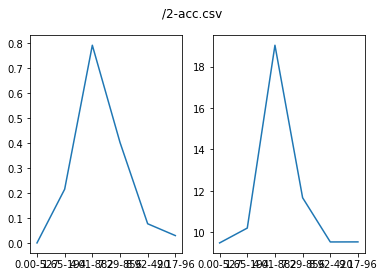

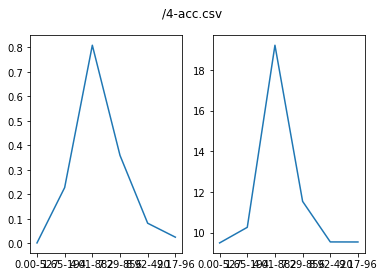

In [121]:



def filterSignal(data, plot):
    #xn = data[:,1] 
    xn = np.sqrt(np.power(data[:,0],2)+np.power(data[:,1],2)+np.power(data[:,2],2))
    
    t = np.arange(len(xn))
    b, a = signal.butter(3, 30, fs=1000)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    y = signal.filtfilt(b, a, xn)

    sp = np.fft.fft(xn) / len(xn) 
    freq = np.fft.fftfreq(sp.shape[-1], 1/800)

    sp = sp[range(int(len(xn)/2))]
    
    tpCount     = len(xn)
    values      = np.arange(int(tpCount/2))
    timePeriod  = tpCount/800
    frequencies = values/timePeriod
    
    sp = np.delete(sp, 0)
    frequencies = np.delete(frequencies,0)
    
    if plot :
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
        fig.suptitle("Signal")
        ax1.plot(t, xn, 'b', alpha=0.75)

        #ax2.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
        #ax2.legend(('lfilter, once', 'lfilter, twice',
        #            'filtfilt'), loc='best')
        ax2.plot(t, z)
        ax2.grid(True)

        ax3.plot(frequencies, sp.real)
    
    return np.amax(sp.real), np.mean(xn)

for file in files :
    fft = []
    mean = []
    for directory in directories : 
        #data = pd.read_csv(directory + file, index_col=None, sep='.', decimal=',')
        data = pd.read_csv(directory + file, index_col=None, sep=',')
        data_np = np.array(data, np.float64)[:,0:3]
        fft_v, mean_v = filterSignal(data_np, False)
        fft = np.append(fft, fft_v)
        mean = np.append(mean, mean_v)


    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(file)
    ax1.plot(directories, fft)

    ax2.plot(directories, mean)
    fig.show